# Estadística Aplicada
## Alejandro Hernández Cerda 1903855
### 28 de Febrero del 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from lifelines import KaplanMeierFitter

In [6]:
#introducimos los datos
dic1 = {'tiempo':[6,6,6,7,10,13,16,22,23,6,9,11,17,10,19,20,25,32,32,34,35],'evento':[1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]}

In [8]:
datos  = pd.DataFrame(dic1)

In [10]:
datos.head()

,tiempo,evento
0,6,1
1,6,1
2,6,1
3,7,1
4,10,1


In [18]:
kmf1 = KaplanMeierFitter().fit(datos['tiempo'],datos['evento'])
kmf1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,21,21
6.0,4,3,1,0,21
7.0,1,1,0,0,17
9.0,1,0,1,0,16
10.0,2,1,1,0,15
11.0,1,0,1,0,13
13.0,1,1,0,0,12
16.0,1,1,0,0,11
17.0,1,0,1,0,10


In [22]:
kmf1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
6.0,0.857143
7.0,0.806723
9.0,0.806723
10.0,0.752941
11.0,0.752941
13.0,0.690196
16.0,0.627451
17.0,0.627451


<AxesSubplot:xlabel='timeline'>

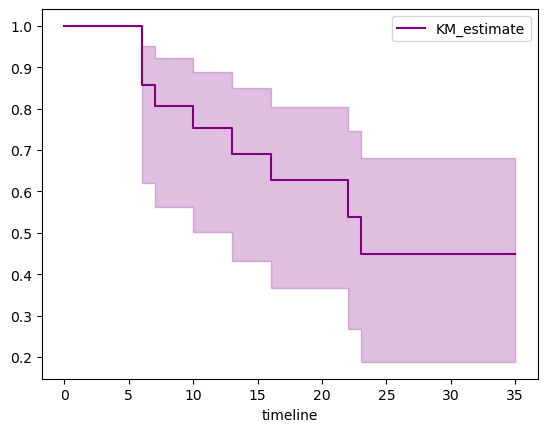

In [24]:
kmf1.plot_survival_function(color = 'purple')

In [30]:
kmf1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
6.0,0.619718,0.951552
7.0,0.563147,0.922809
9.0,0.563147,0.922809
10.0,0.503200,0.889362
11.0,0.503200,0.889362
13.0,0.431610,0.849066
16.0,0.367511,0.804912
17.0,0.367511,0.804912
19.0,0.367511,0.804912


In [31]:
kmf1.median_survival_time_

23.0

kmf1.plot_hazard 
### En el modelo de kaplan-meier, no nos generá una funcion de riesgo y por lo mismo, la funcion de riesgo no nos la da python

In [38]:
dic_tra = {'tiempo':[12,19,20,20,33],'evento':[1,1,1,0,0]}

In [39]:
dic_not = {'tiempo':[3,5,7,9,18],'evento':[1,1,1,0,1]}

In [42]:
tratan = pd.DataFrame(dic_tra)
no_trat = pd.DataFrame(dic_not)

In [44]:
kmf_t=KaplanMeierFitter().fit(tratan['tiempo'],tratan['evento'])
kmf_n=KaplanMeierFitter().fit(no_trat['tiempo'],no_trat['evento'])

<AxesSubplot:xlabel='timeline'>

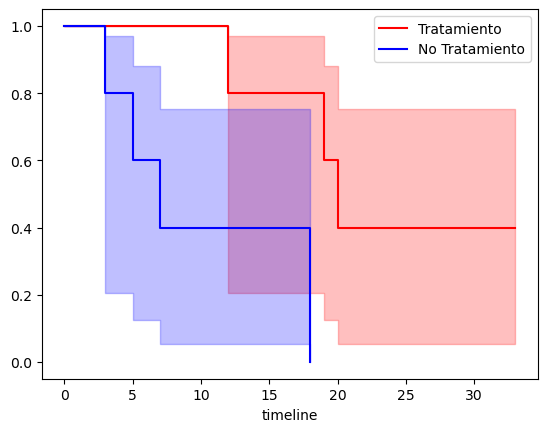

In [46]:
kmf_t.plot_survival_function(label= 'Tratamiento',color='Red')
kmf_n.plot_survival_function(label = 'No Tratamiento',color='Blue')

Log-rank test ~$X^2$\
Ho: $S_1(t)=S_2(t)$\
H1: $S_1(t)\neq S_2(t)$

In [47]:
from lifelines.statistics import logrank_test

In [48]:
lrt=logrank_test(tratan['tiempo'],tratan['evento'],no_trat['tiempo'],no_trat['evento'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.50 0.01      7.34

In [49]:
lrt.p_value

0.006174984400799619

In [53]:
print(f'Cnn un p-value: {lrt.p_value.round(5)} rechazamos Ho,\nSignifica que las funciones de supervivencia son distintas')

Cnn un p-value: 0.00617 rechazamos Ho,
Significa que las funciones de supervivencia son distintas


In [55]:
from lifelines import ExponentialFitter

In [59]:
ex1=ExponentialFitter().fit(tratan['tiempo'],tratan['evento'])

<AxesSubplot:xlabel='timeline'>

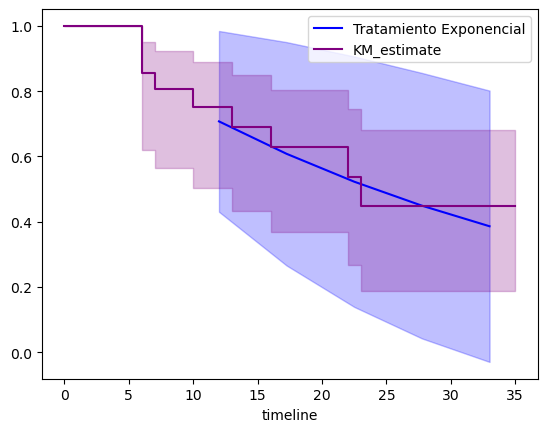

In [60]:
ex1.plot_survival_function(color='Blue',label='Tratamiento Exponencial')
kmf1.plot_survival_function(color='Purple',)

In [61]:
from lifelines import WeibullFitter

In [62]:
weib1=WeibullFitter().fit(datos['tiempo'],datos['evento'])

<AxesSubplot:xlabel='timeline'>

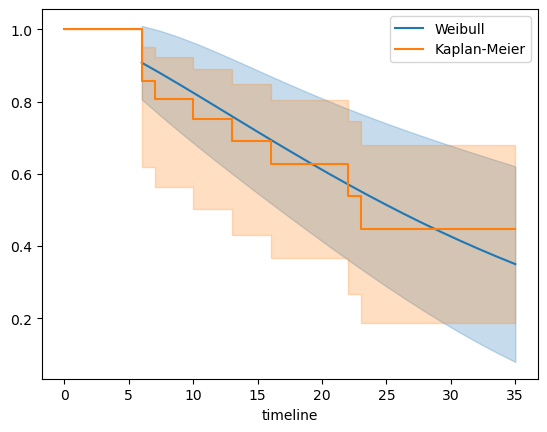

In [63]:
weib1.plot_survival_function(label='Weibull')
kmf1.plot_survival_function(label='Kaplan-Meier')